
You are just hired as a data analyst in the newly formed analytics department of RiiiD, which is a leading AI startup company specializing in providing learning resources and adaptive practices to English learners in South Korea. On the first day of your job, you are invited to attend a meeting with the business operation team in which you are briefed on the company’s platform. Then you are handed over a dataset (‘EdNet’) collected from this platform over the last two years from over 700K users. This dataset logged detailed user activities while they were interacting with systems.  Intrigued by the sheer amount of data collected, your manager is interested in how the analytics department can help to support the company's missions to reimagine the learner’s experience using AI/ML/data analytics techniques. You are asked to look into the data and prepare a brief for your manager. Specifically, your manager is looking for answers to the following questions. 



In [2]:
import pandas as pd
import numpy
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
import glob


In [ ]:
path="/drive/My Drive/EdNet-KT4/KT4/"
all_files=glob.glob(path+"*.csv")

all_files

In [5]:
li_mape=map(lambda filename:pd.read_csv(filename),all_files[:100])
lis=list(li_mape)
questions=pd.read_csv('/drive/My Drive/EdNet-Contents/contents/questions.csv')
payements=pd.read_csv('/drive/My Drive/EdNet-Contents/contents/payments.csv')
lectures=pd.read_csv('/drive/My Drive/EdNet-Contents/contents/lectures.csv')
coupons=pd.read_csv('/drive/My Drive/EdNet-Contents/contents/coupons.csv')


Who are the users?  To answer this question, you will need to compile a user profile table (Table 1) with information about users, including
Overall practice volume and performance (e.g. # of questions answered, % of questions answered correctly)
Learning activity (e.g. # lectures watched, # explanation read)
Add three additional metrics you would like to compute to describe users

Create a few plots to illustrate the information in the tables. Feel free to choose the type of plot you think is appropriate.  


In [7]:
user_profile_df = pd.DataFrame(columns=['user_id', 'questions_answered', 'percent_correct', 'learning_activity'])

#iterating through 100 student files
for i in range(100):
  lis_pd=pd.DataFrame(lis[i])
  #adding a user_id with respective the number of the file
  lis_pd['user_id'] = i
 #merge the student data with the questions dataframe on the 'item_id' column
  merged_df = pd.merge(lis_pd, questions, left_on='item_id', right_on='question_id', how='left')
  # Create a new column called 'correct' that indicates whether the student's answer matches the correct answer
  merged_df['correct'] = merged_df.apply(lambda x: x['user_answer'] == x['correct_answer'], axis=1)
  # Group the data by 'user_id' and aggregate the relevant columns
  student_profile_df = merged_df.groupby('user_id').agg({'question_id': 'count', 'correct': 'mean', 'cursor_time': 'sum','source': lambda x: x.mode().iat[0],'action_type':lambda x: x.mode().iat[0]})
  # Rename the columns to more meaningful names
  student_profile_df.rename(columns={'question_id': 'questions_answered', 'correct': 'percent_correct', 'cursor_time': 'learning_activity'}, inplace=True)
  student_profile_df['percent_correct'] = student_profile_df['percent_correct'] * 100
  user_profile_df = user_profile_df.append(student_profile_df)

print(user_profile_df)

   user_id questions_answered  percent_correct  learning_activity     source  \
0      NaN                  6        11.111111                0.0  diagnosis   
1      NaN                  7        13.043478            22778.0  diagnosis   
2      NaN                 14        23.684211            25286.0  diagnosis   
3      NaN                 10         5.882353           111321.0  diagnosis   
4      NaN                  5        23.529412            16588.0  diagnosis   
..     ...                ...              ...                ...        ...   
95     NaN                586         8.914597          9764982.0     sprint   
96     NaN                  7         3.448276            34796.0  diagnosis   
97     NaN                  9        17.241379                0.0  diagnosis   
98     NaN                  5         7.692308                0.0  diagnosis   
99     NaN                 13        15.151515            21768.0  diagnosis   

   action_type  
0        enter  
1    

In [8]:
import matplotlib.pyplot as plt

What are the questions/items? To answer this question, you will need to compile a question profile table (Table 2)  with at least the following information including
Question ID
Question Type
Number of times being practiced
Number of times answered correctly

Create a few plots to illustrate the information in the tables. Feel free to choose the type of plot you think is appropriate.


         questions_answered  percent_correct  total_cursor_time  \
user_id                                                           
0                        18        11.111111                0.0   
1                        23        13.043478            22778.0   
2                        38        23.684211            25286.0   
3                        34         5.882353           111321.0   
4                        17        23.529412            16588.0   
...                     ...              ...                ...   
95                     2939         8.914597          9764982.0   
96                       29         3.448276            34796.0   
97                       29        17.241379                0.0   
98                       13         7.692308                0.0   
99                       33        15.151515            21768.0   

         num_sources_used  num_platforms_used most frequent action  
user_id                                                    

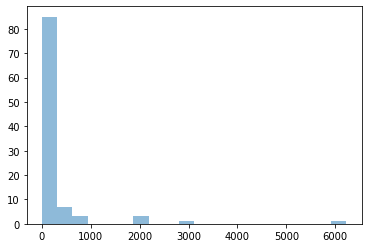

In [9]:
# Create an empty list to store the user profile dataframes
user_profiles = []

# Loop through the student data
for i in range(100):
    student_df=pd.DataFrame(lis[i])
    student_df['user_id'] = i
    
    # Merge the student data with the questions dataframe on the 'item_id' column
    merged_df = pd.merge(student_df, questions, left_on='item_id', right_on='question_id', how='left')
    # Create a new column called 'correct' that indicates whether the student's answer matches the correct answer
    merged_df['correct'] = merged_df.apply(lambda x: x['user_answer'] == x['correct_answer'], axis=1)
    # Group the data by 'user_id' and aggregate the relevant columns
    user_profile_df = merged_df.groupby('user_id').agg({'timestamp': 'count', 'correct': 'mean', 'cursor_time': 'sum', 'source': 'nunique', 'platform': 'nunique','action_type':lambda x: x.mode().iat[0]})
    # Rename the columns to more meaningful names
    user_profile_df.rename(columns={'timestamp': 'questions_answered', 'correct': 'percent_correct', 'cursor_time': 'total_cursor_time', 'source': 'num_sources_used', 'platform': 'num_platforms_used','action_type':'most frequent action'}, inplace=True)
    # Calculate the percentage of questions answered correctly
    user_profile_df['percent_correct'] = user_profile_df['percent_correct'] * 100
    # Append the user profile dataframe to the list
    user_profiles.append(user_profile_df)

# Concatenate the list of user profile dataframes into a single dataframe
user_profiles_df = pd.concat(user_profiles)

# Print the user profiles dataframe
print(user_profiles_df)



# Create a histogram to visualize the distribution of questions answered per user

plt.hist(user_profiles_df['questions_answered'], bins=20,alpha=0.5,label='x')
#plt.hist(user_profile_df['total_cursor_time'],bins,alpha=0.5)
plt.show()


Design a modified metric of “accuracy” to fairly describe users’ ability by considering the difficulty level derived from Table 2.  Be creative. Describe the procedure to compute
 the metrics.  Be sure to be specific so that interns can use your pseudo code to implement the metrics without much trouble. Implement the proposed metrics and plot a histogram of
  the metrics across all users (or a subset of users of your choice) and interpret the results.


     question_id  times_practiced  times_answered_correctly  part  \
0            q10                9                         2   1.0   
1           q100                1                         1   1.0   
2          q1000                1                         1   2.0   
3         q10013                1                         1   5.0   
4         q10025                2                         0   5.0   
...          ...              ...                       ...   ...   
2488       q9985                2                         1   5.0   
2489       q9991                1                         1   5.0   
2490       q9996                2                         1   5.0   
2491       q9997                5                         3   5.0   
2492       q9998                1                         1   5.0   

               tags  no.of students did that question  
0          17;7;182                                 9  
1          22;2;181                                 1  
2  

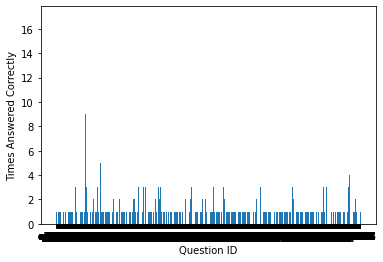

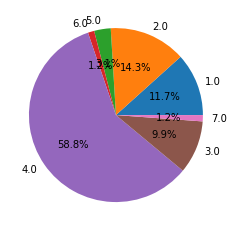

In [15]:
merged_df = pd.DataFrame()

for i in range(1,100):
    global merged_df
    student_df=pd.DataFrame(lis[i])
    student_df['user_id'] = i
    merged_df = pd.concat([merged_df, student_df])

#print(merged_df)

# Merge the student data with the questions dataframe on the 'item_id' column
#merged_df = pd.concat([ pd.DataFrame(lis[i]) for i in range(100)])

merged_df = pd.merge(merged_df, questions, left_on='item_id', right_on='question_id', how='left')
#print(merged_df)
# Create a new column called 'correct' that indicates whether the student's answer matches the correct answer
merged_df['correct'] = merged_df.apply(lambda x: x['user_answer'] == x['correct_answer'], axis=1)

# Create a question profile table by grouping the data by 'question_id' and aggregating relevant columns
question_profile_df = merged_df.groupby('question_id').agg({'timestamp': 'count', 'correct': 'sum', 'part': 'max', 'tags': 'max','user_id':'count'}).reset_index()

# Rename the columns to more meaningful names
question_profile_df.rename(columns={'timestamp': 'times_practiced', 'correct': 'times_answered_correctly','user_id':'no.of students did that question'}, inplace=True)



# Print the question profile dataframe
print(question_profile_df)

# Create a bar plot to visualize the distribution of times answered correctly for each question
plt.bar(question_profile_df['question_id'], question_profile_df['times_answered_correctly'])
plt.xlabel('Question ID')
plt.ylabel('Times Answered Correctly')
plt.show()

# Create a pie chart to visualize the distribution of questions by part
plt.pie(question_profile_df.groupby('part')['question_id'].count(), labels=question_profile_df['part'].unique(), autopct='%1.1f%%')
plt.show()

Pick a user with a reasonable amount of activity (you will need to define the “reasonableness” and specify the criteria) and create a dashboard that consists of a 
series of plots to tell a story of this user’s activity patterns. For inspiration, you may look at the user dashboard for fitness trackers such as Fitbit. 



     question_id  weighted_accuracy
0            q10           0.666667
1           q100           3.000000
2          q1000           3.000000
3         q10013           3.000000
4         q10025           0.000000
...          ...                ...
2488       q9985           1.500000
2489       q9991           3.000000
2490       q9996           1.500000
2491       q9997           1.800000
2492       q9998           3.000000

[2493 rows x 2 columns]


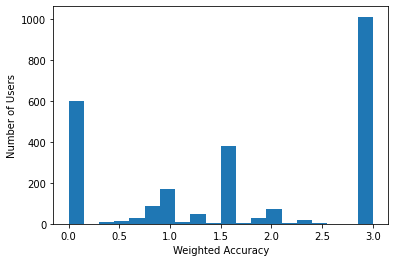

In [16]:






# Create a new column in the question profile table called 'difficulty_level'
# that indicates the difficulty level of each question, for example by using the tags column
question_profile_df['difficulty_level'] = question_profile_df.apply(lambda x: 1 if 'easy' in x['tags'] else 2 if 'medium' in x['tags'] else 3, axis=1)

# Create a new column in the question profile table that indicates the weighted accuracy
question_profile_df['weighted_accuracy'] = question_profile_df.apply(lambda x: (x['times_answered_correctly']/x['times_practiced'])*x['difficulty_level'], axis=1)

# Create a user_profile_df by grouping the question profile dataframe by 'user_id' and computing the average weighted accuracy
user_profile_df = question_profile_df.groupby('question_id').agg({'weighted_accuracy': 'mean'}).reset_index()

# Print the user profile dataframe
print(user_profile_df)

# Plot a histogram of the modified accuracy metric across all users
plt.hist(user_profile_df['weighted_accuracy'], bins=20)
plt.xlabel('Weighted Accuracy')
plt.ylabel('Number of Users')
plt.show()